In [218]:
###
# This code file contains an import of all of the libraries we expect to use in the final project at the top. 
# Unused imports will be removed in the phase 4 submission. 
# Then the dataset is loaded in as a CSV file downloaded from the same directory.
# We summarize the dataset and replace the Class names with 0 and 1 before starting the cleaning process we check for missing values.
# This particular dataset had no missing values so the only step of the cleaning process that changes the dataset is removal of outliers.
# We include data visualizations before and after removing the outliers based off a z score of 3.
###


# Load libraries
# remove unused imports in final project if code is turned in
from pandas import read_csv
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

import sklearn.metrics as met
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline

In [219]:
# ----BEFORE CLEANING----
names = ['area', 'major', 'minor', 'ecc', 'convex', 'extent', 'perimeter', 'class']
dataset = read_csv('Raisin_Dataset_CSV.csv', header=0, names=names)
# summarize the dataset
print(dataset.describe())

                area       major       minor         ecc         convex  \
count     900.000000  900.000000  900.000000  900.000000     900.000000   
mean    87804.127778  430.929950  254.488133    0.781542   91186.090000   
std     39002.111390  116.035121   49.988902    0.090318   40769.290132   
min     25387.000000  225.629541  143.710872    0.348730   26139.000000   
25%     59348.000000  345.442898  219.111126    0.741766   61513.250000   
50%     78902.000000  407.803951  247.848409    0.798846   81651.000000   
75%    105028.250000  494.187014  279.888575    0.842571  108375.750000   
max    235047.000000  997.291941  492.275279    0.962124  278217.000000   

           extent    perimeter       class  
count  900.000000   900.000000  900.000000  
mean     0.699508  1165.906636    0.500000  
std      0.053468   273.764315    0.500278  
min      0.379856   619.074000    0.000000  
25%      0.670869   966.410750    0.000000  
50%      0.707367  1119.509000    0.500000  
75%      

In [220]:
# replace class names with 0 or 1 values for classification
dataset = dataset.replace('Kecimen', 0)
dataset = dataset.replace('Besni', 1)
print(dataset.sample(20))

       area       major       minor       ecc  convex    extent  perimeter  \
776  165940  624.844959  340.695631  0.838275  170781  0.779464   1641.140   
88    35237  267.553779  173.525103  0.761162   37418  0.706832    750.909   
584  101103  484.165901  269.145887  0.831252  105500  0.670000   1307.683   
153   78991  362.640870  279.090840  0.638518   80355  0.708897   1071.385   
145   69317  393.398997  228.722883  0.813617   72170  0.661674   1066.388   
416   33615  254.472230  171.001050  0.740566   35376  0.788049    719.935   
540  168620  730.760960  295.500462  0.914594  172003  0.796730   1725.003   
167   41283  268.125361  199.635401  0.667556   42505  0.732384    798.515   
380   83071  400.465688  265.928797  0.747689   84531  0.718458   1112.784   
253   39439  246.763611  212.635393  0.507424   42795  0.646827    793.005   
122   51180  288.631065  226.630491  0.619254   52396  0.737443    855.997   
620   78984  427.494276  236.882575  0.832438   82328  0.698417 

In [221]:
# count the missing values
print(dataset.isnull().sum())

area         0
major        0
minor        0
ecc          0
convex       0
extent       0
perimeter    0
class        0
dtype: int64


In [222]:
# locate the column with the 99999 values
num_missing = (dataset == 99999).sum()
print(num_missing)
# find and print the indices
for col in dataset:
    if num_missing[col] != 0:
        indices = dataset[dataset[col] == 99999].index
        print(col + ":" + str(list(indices)))

area         0
major        0
minor        0
ecc          0
convex       0
extent       0
perimeter    0
class        0
dtype: int64


In [223]:
# locate the column with the 0 values
num_missing = (dataset == 0).sum()
print(num_missing)
# find and print the indices
# we can ignore the 0 values in class because 0 is a valid value
for col in dataset:
    if num_missing[col] != 0:
        indices = dataset[dataset[col] == 0].index
        print(col + ":" + str(list(indices)))

area           0
major          0
minor          0
ecc            0
convex         0
extent         0
perimeter      0
class        450
dtype: int64
class:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,

In [224]:
# ----Clean the Data----
threshold_z = 3
outlier_indices = []
for col in dataset:
    if col != "class":
        z = np.abs(stats.zscore(dataset[col]))
        outlier_indices_col = np.where(z > threshold_z)[0]
        outlier_indices.extend(outlier_indices_col)
print(outlier_indices)
dataset = dataset.drop(outlier_indices)
print(dataset.describe())

[487, 507, 552, 580, 581, 668, 708, 804, 812, 866, 880, 85, 487, 506, 694, 836, 490, 552, 581, 616, 769, 804, 880, 13, 23, 34, 43, 106, 156, 192, 197, 235, 251, 253, 316, 356, 483, 880, 85, 487, 506, 694, 708, 804, 812, 836, 866, 880, 85, 290, 459, 487, 498, 506, 536, 579, 682, 694, 802, 829, 836, 85, 290, 487, 506, 694, 836]
                area       major       minor         ecc         convex  \
count     860.000000  860.000000  860.000000  860.000000     860.000000   
mean    85689.111628  425.399183  251.839739    0.785030   88762.722093   
std     35714.789417  105.363100   46.579123    0.079252   36697.834521   
min     25387.000000  225.629541  143.710872    0.517135   26139.000000   
25%     59230.500000  345.829099  218.450742    0.744472   61489.250000   
50%     78122.500000  405.796609  246.643156    0.798846   80835.500000   
75%    103121.000000  486.582391  277.440665    0.840973  107340.500000   
max    204226.000000  769.425149  403.719328    0.928094  209580.000000 

In [225]:
# ---- PHASE 3 ----

# Normalize the data using min max normalization
dataset = dataset
for col in dataset:
    if col != 'class':
        dataset[[col]] = (dataset[[col]] - dataset [[col]].min()) / (dataset[[col]].max() - dataset[[col]].min())
print(dataset.describe())

             area       major       minor         ecc      convex      extent  \
count  860.000000  860.000000  860.000000  860.000000  860.000000  860.000000   
mean     0.337187    0.367362    0.415867    0.651878    0.341383    0.534093   
std      0.199704    0.193755    0.179145    0.192848    0.200053    0.162531   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.189240    0.221038    0.287452    0.553187    0.192706    0.432490   
50%      0.294877    0.331314    0.395881    0.685497    0.298169    0.552730   
75%      0.434659    0.479873    0.514329    0.788006    0.442657    0.646589   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        perimeter       class  
count  860.000000  860.000000  
mean     0.417064    0.494186  
std      0.192980    0.500257  
min      0.000000    0.000000  
25%      0.272251    0.000000  
50%      0.387888    0.000000  
75%      0.530645    1.000000  
max      1.000

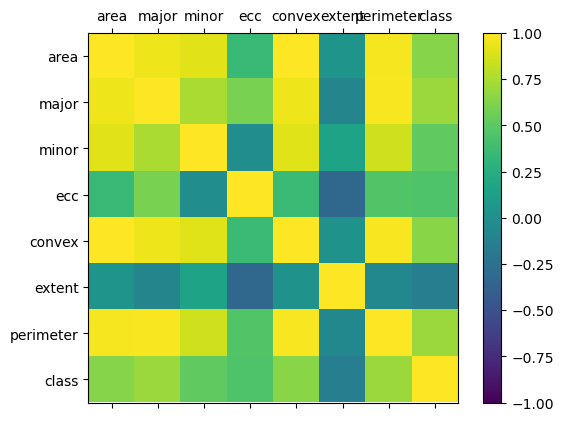

In [226]:
# Analyze the Correlation Matrix post normalization
correlations = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [227]:
# Drop Features with low correlation
# The lowest feature will be dropped.
# We chose to drop extent (which had a correlation of -0.145).
# We chose not to do PCA because we have a limited number of features and samples.
dataset = dataset.drop(dataset.columns[[5]], axis=1)
print(dataset.describe())


             area       major       minor         ecc      convex   perimeter  \
count  860.000000  860.000000  860.000000  860.000000  860.000000  860.000000   
mean     0.337187    0.367362    0.415867    0.651878    0.341383    0.417064   
std      0.199704    0.193755    0.179145    0.192848    0.200053    0.192980   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.189240    0.221038    0.287452    0.553187    0.192706    0.272251   
50%      0.294877    0.331314    0.395881    0.685497    0.298169    0.387888   
75%      0.434659    0.479873    0.514329    0.788006    0.442657    0.530645   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            class  
count  860.000000  
mean     0.494186  
std      0.500257  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


In [228]:
# Split the dataset
array = dataset.values
X = array[:,0:5]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
# Use and evaluate the ML models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier(n_estimators=10, max_features=7, max_depth=2, random_state=1)))
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))



LR: 0.853240 (0.041603)
LDA: 0.875021 (0.034945)
KNN: 0.843052 (0.028703)
CART: 0.792136 (0.036225)
NB: 0.835784 (0.027367)
SVM: 0.850320 (0.038807)
RFC: 0.844544 (0.037577)


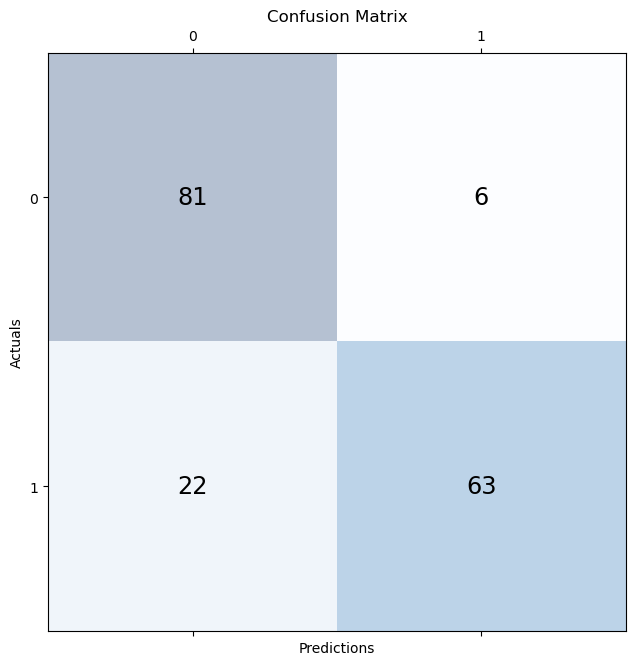

In [229]:
# We will be using Linear discriminant analysis since it has the highest accuracy
# Plot the confusion Matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=10, max_features=7, max_depth=2, random_state=1))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [230]:
# calculate the precision

precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

Precision: 0.913043


In [231]:
# calculate the Recall

recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Recall: 0.741176


In [232]:
# Calculate the specificity
specificity = tn / (tn+fp)
print(specificity)

0.9310344827586207


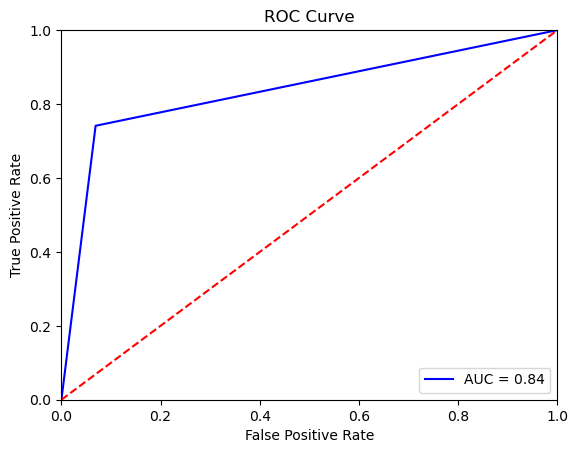

In [233]:
# Calculate the ROC curves

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()